In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import folium
from folium.plugins import HeatMap
from geopy.distance import geodesic 
import scipy
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline


In [16]:
data = pd.read_csv('../Data/kc_house_data_train.csv')
data.drop(columns = 'Unnamed: 0', inplace = True)

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [18]:
data.shape

(17290, 21)

In [19]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [20]:
data.price.mean()

540739.5486408329

Text(0.5, 1.0, 'Bathrooms')

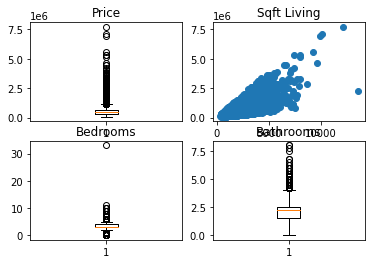

In [21]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(data.price,)
axs[0, 0].set_title('Price')
axs[0, 1].scatter(data.sqft_living, y = data.price)
axs[0, 1].set_title('Sqft Living')
axs[1, 0].boxplot(data.bedrooms,)
axs[1, 0].set_title('Bedrooms')
axs[1, 1].boxplot(data.bathrooms,)
axs[1, 1].set_title('Bathrooms')

# sns.boxplot(data.sqft_living)

In [35]:
above_5std_living = data.sqft_living.mean()+(5*data.sqft_living.std())
above_5std_bathrooms = data.bathrooms.mean()+(5*data.bathrooms.std())
above_5std_bedrooms = data.bedrooms.mean()+(5*data.bedrooms.std())

In [247]:
above_5std_bedrooms

8.069197314719396

In [26]:
above_5std_bathrooms

5.964324851023143

In [36]:
data['sqft_living'] = np.where(data['sqft_living']>above_5std_living, above_5std_living, data['sqft_living'])
data['bathrooms'] = np.where(data['bathrooms']>above_5std_bathrooms, 6, data['bathrooms'])
data['bedrooms'] = np.where(data['bedrooms']>above_5std_bedrooms, 8, data['bedrooms'])
data['bathrooms'] = np.where(data['bathrooms']==0, .5, data['bathrooms'])
data['bedrooms'] = np.where(data['bedrooms']==0, .5, data['bedrooms'])

Text(0.5, 1.0, 'Bathrooms')

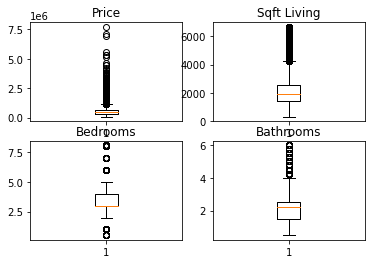

In [11]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(data.price,)
axs[0, 0].set_title('Price')
axs[0, 1].boxplot(data.sqft_living,)
axs[0, 1].set_title('Sqft Living')
axs[1, 0].boxplot(data.bedrooms,)
axs[1, 0].set_title('Bedrooms')
axs[1, 1].boxplot(data.bathrooms,)
axs[1, 1].set_title('Bathrooms')

In [31]:
data['sqft_yd'] = data.sqft_lot - (data.sqft_living/data.floors)

In [264]:
data.sqft_yd.mean()

13754.966121573822

In [37]:
data[data['bedrooms']==data['bedrooms'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,sqft_yd
1015,1652500060,20140711T000000,1650000.0,8.0,2.75,4040.00000,20666,1.0,0,0,...,2020,1962,0,98004,47.6340,-122.221,3670,20500,408.415842,16626.000000
2356,1773100755,20140821T000000,520000.0,8.0,3.00,3000.00000,4960,2.0,0,0,...,600,1918,1999,98106,47.5560,-122.363,1420,4960,173.333333,3460.000000
2991,8813400155,20141219T000000,808000.0,8.0,3.75,3460.00000,4600,2.0,0,0,...,600,1987,0,98105,47.6617,-122.289,2170,3750,233.526012,2870.000000
3425,424049043,20140811T000000,450000.0,8.0,6.00,4050.00000,6504,2.0,0,0,...,0,1996,0,98144,47.5923,-122.301,1448,3866,111.111111,4479.000000
3680,8812401450,20141229T000000,660000.0,8.0,3.00,2920.00000,3745,2.0,0,0,...,1060,1913,0,98105,47.6635,-122.320,1810,3745,226.027397,2285.000000
3757,1346300150,20141020T000000,3300000.0,8.0,4.00,6595.86766,11750,3.5,0,0,...,1620,1904,0,98112,47.6263,-122.314,4210,8325,493.896834,9840.983628
4127,3756900027,20141125T000000,575000.0,8.0,3.00,3840.00000,15990,1.0,0,0,...,1310,1961,0,98034,47.7111,-122.211,1380,8172,149.739583,12150.000000
8207,8823900290,20150317T000000,1400000.0,8.0,4.00,4620.00000,5508,2.5,0,0,...,750,1915,0,98105,47.6684,-122.309,2710,4320,303.030303,3660.000000
8419,685000115,20141007T000000,2150000.0,8.0,6.00,4340.00000,9415,2.0,0,0,...,0,1967,0,98004,47.6316,-122.202,2050,9100,495.391705,7245.000000
8446,8823901445,20150313T000000,934000.0,8.0,3.00,2820.00000,4480,2.0,0,0,...,940,1918,0,98105,47.6654,-122.307,2460,4400,331.205674,3070.000000


<AxesSubplot:xlabel='zipcode', ylabel='sqft_living'>

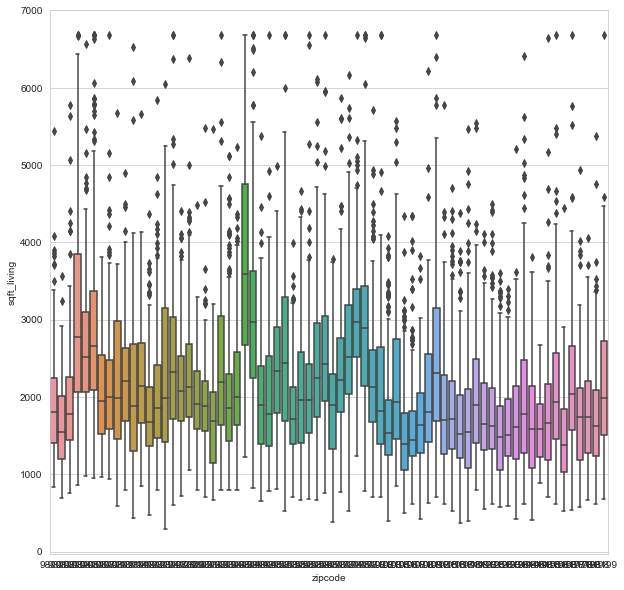

In [265]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x = data.zipcode, y = data.sqft_living)
#sns.boxplot(x = data.zipcode, y = data.price)

In [159]:
data.sort_values('sqft_living', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,price_sqft,sqft_yd,bed_bath_ratio,coordinates,dist_sb,dist_tmobile,dist_amazon,age,geometry
3275,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,217800,168.389956,303238.666667,0.875000,"(47.6675, -121.986)",17.400534,10.383900,16.669709,22,POINT (-121.98600 47.66750)
10366,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8800,639.004149,22780.000000,0.750000,"(47.6298, -122.323)",3.424681,8.160504,0.819170,111,POINT (-122.32300 47.62980)
6903,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,25449,703.436255,32305.000000,1.111111,"(47.65, -122.214)",7.426110,5.416826,6.040460,81,POINT (-122.21400 47.65000)
7519,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,42730,696.157735,26429.000000,0.774194,"(47.6305, -122.24)",5.636415,4.988834,4.553760,20,POINT (-122.24000 47.63050)
15816,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,10454,484.232365,3428.000000,0.740741,"(47.557, -122.21)",6.115450,2.569247,7.453681,38,POINT (-122.21000 47.55700)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0,...,6720,666.666667,6300.000000,1.333333,"(47.552, -122.311)",2.317266,7.051919,5.014617,99,POINT (-122.31100 47.55200)
9624,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,...,4975,545.357143,2878.000000,1.000000,"(47.5375, -122.391)",3.958764,10.925761,6.393430,72,POINT (-122.39100 47.53750)
3748,6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0,...,8636,792.682927,8226.000000,1.333333,"(47.5077, -122.357)",5.159369,10.217166,7.984420,68,POINT (-122.35700 47.50770)
6345,9266700190,20150511T000000,245000.0,1,1.00,390,2000,1.0,0,0,...,5100,628.205128,1610.000000,1.000000,"(47.6938, -122.347)",7.809995,11.618266,4.951672,101,POINT (-122.34700 47.69380)


In [38]:
sns.set_style('whitegrid')

In [39]:
data['bed_bath_ratio'] = data.bedrooms/data.bathrooms

<AxesSubplot:xlabel='bed_bath_ratio', ylabel='price'>

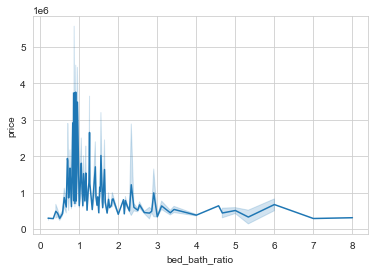

In [40]:
sns.lineplot(x = data.bed_bath_ratio, y = data.price)

In [144]:
data['bedrooms'] = data['bedrooms'].replace(to_replace=33, value=3)

<ipython-input-144-ee85b43d3fe3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bedrooms'] = data['bedrooms'].replace(to_replace=33, value=3)


<AxesSubplot:xlabel='bedrooms'>

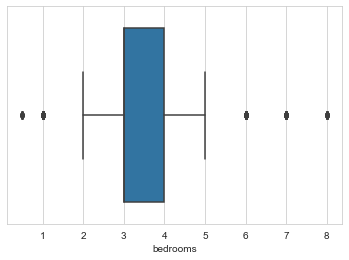

In [41]:
sns.boxplot(x = data.bedrooms)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

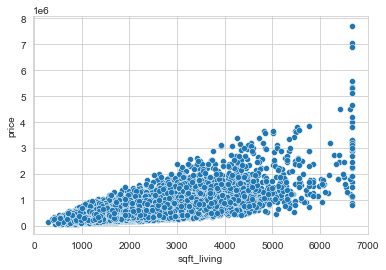

In [271]:
sns.scatterplot(x = data.sqft_living, y = data.price)

In [60]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,sqft_yd,bed_bath_ratio
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,1.728400e+04
mean,4.565502e+09,5.407395e+05,3.370735,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,...,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,263.854204,1.375374e+04,inf
std,2.874656e+09,3.733190e+05,0.911923,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,...,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,109.776947,4.221746e+04,NaN
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,87.588235,-1.510000e+02,0.000000e+00
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000,182.432432,3.805250e+03,1.333333e+00
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,...,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000,244.316761,6.157500e+03,1.600000e+00
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,...,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000,317.454778,9.096000e+03,2.000000e+00
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,810.138889,1.650059e+06,inf


In [42]:
data['coordinates'] = list(zip(data.lat, data.long))

In [43]:
def distance_amazon(column):
    return(geodesic(column,(47.62246, -122.336775)).miles)

In [44]:
def distance_tmobile(column):
    return(geodesic(column,(47.57879, -122.16547)).miles)

In [45]:
def distance_sb(column):
    return(geodesic(column,(47.581002000, -122.335898000)).miles)

In [46]:
data['dist_sb'] = data['coordinates'].map(distance_sb)

In [47]:
data['dist_tmobile'] = data['coordinates'].map(distance_tmobile)

In [48]:
data['dist_amazon'] = data['coordinates'].map(distance_amazon)

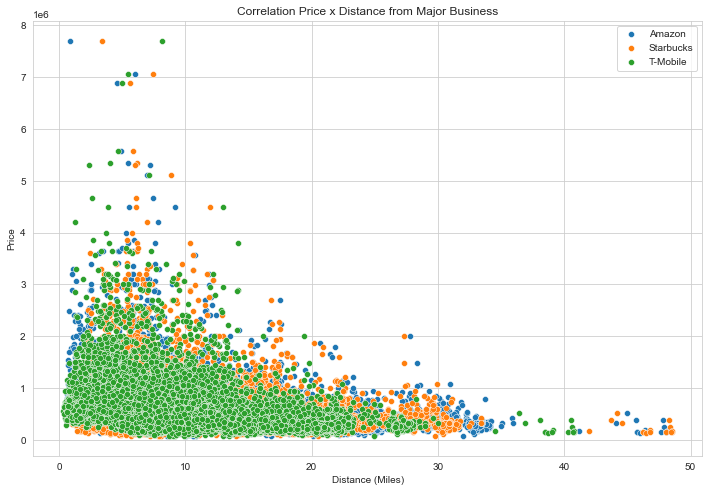

In [49]:
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x = data.dist_amazon, y = data.price, label = 'Amazon')
sns.scatterplot(x = data.dist_sb, y = data.price, label ='Starbucks')
sns.scatterplot(x = data.dist_tmobile, y = data.price, label = 'T-Mobile')
plt.legend()
ax.set_xlabel('Distance (Miles)')
ax.set_ylabel('Price')
ax.set_title('Correlation Price x Distance from Major Business')
plt.savefig('Distance Scatterplot')

In [280]:
distance_df = data[['price', 'dist_amazon', 'dist_sb', 'dist_tmobile']]
distance_df.corr()

,price,dist_amazon,dist_sb,dist_tmobile
price,1.000000,-0.298337,-0.233238,-0.355573
dist_amazon,-0.298337,1.000000,0.952374,0.651752
dist_sb,-0.233238,0.952374,1.000000,0.679869
dist_tmobile,-0.355573,0.651752,0.679869,1.000000


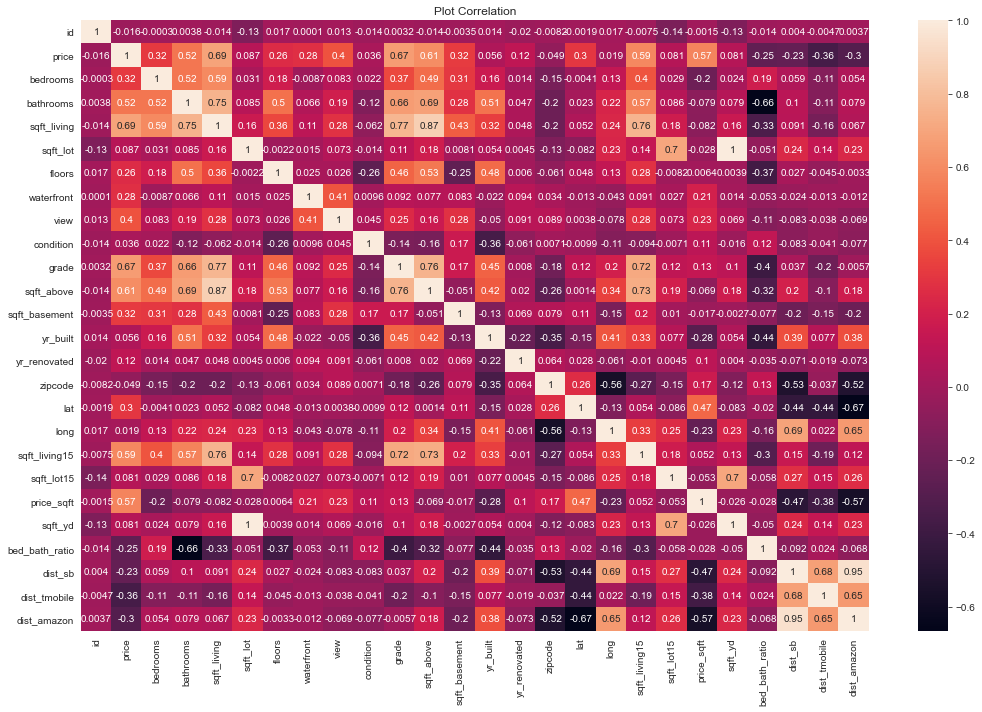

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.title('Plot Correlation')
plt.tight_layout()
plt.show()

In [282]:
data['age'] = 2021 - data['yr_built']

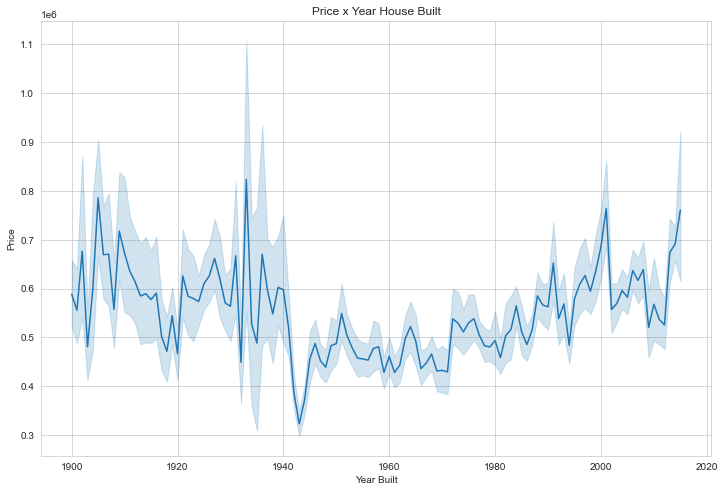

In [283]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = data['yr_built'], y = data['price'])
ax.set_xlabel('Year Built')
ax.set_ylabel('Price')
ax.set_title('Price x Year House Built')
plt.savefig('Year Built Lineplot')

<AxesSubplot:xlabel='sqft_yd', ylabel='price'>

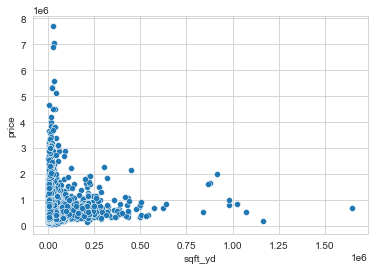

In [284]:
sns.scatterplot(x = data.sqft_yd, y = data.price)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

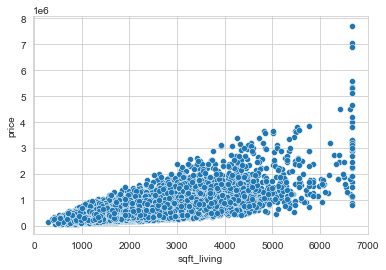

In [285]:
sns.scatterplot(x = data.sqft_living, y = data.price)

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

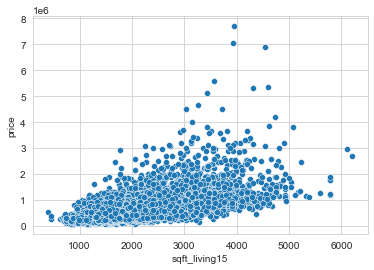

In [75]:
sns.scatterplot(x = data.sqft_living15, y = data.price)

<AxesSubplot:xlabel='floors', ylabel='price'>

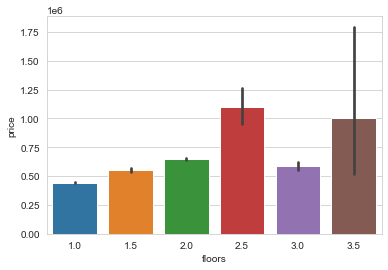

In [286]:
sns.barplot(x = data.floors, y = data.price)

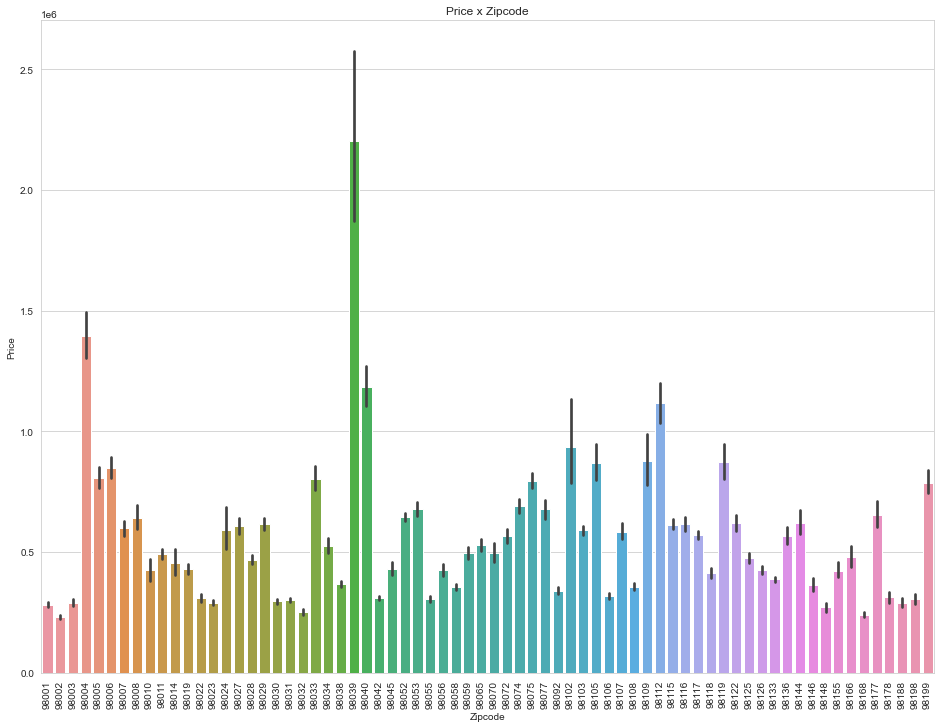

In [287]:
fig, ax = plt.subplots(figsize = (16,12))
zipcode_graph = sns.barplot(x = data.zipcode, y = data.price)
plt.xticks(rotation = 90)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')
ax.set_title('Price x Zipcode')
plt.savefig('Price by Zipcode')

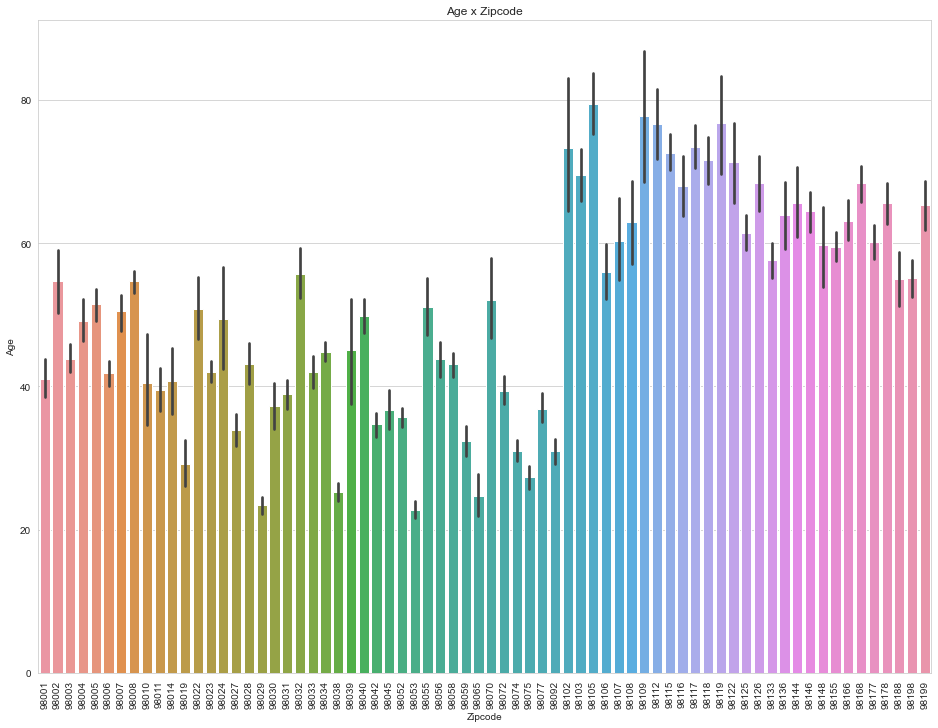

In [201]:
fig, ax = plt.subplots(figsize = (16,12))
zipcode_graph = sns.barplot(x = data.zipcode, y = data.age)
plt.xticks(rotation = 90)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Age')
ax.set_title('Age x Zipcode')
plt.savefig('Age by Zipcode')

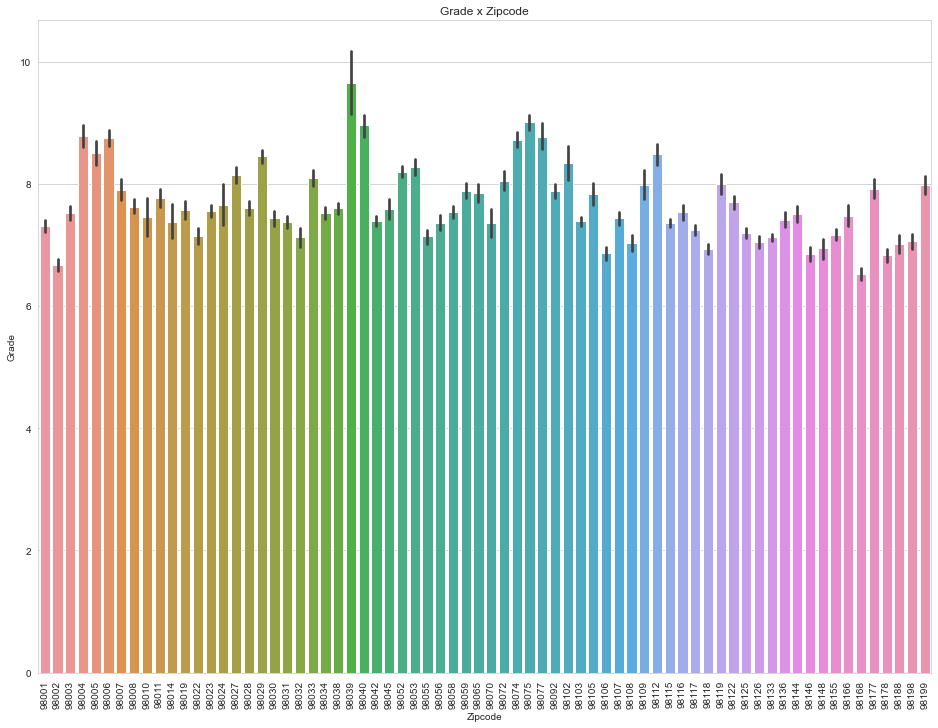

In [202]:
fig, ax = plt.subplots(figsize = (16,12))
zipcode_graph = sns.barplot(x = data.zipcode, y = data.grade)
plt.xticks(rotation = 90)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Grade')
ax.set_title('Grade x Zipcode')
plt.savefig('Grade by Zipcode')

<AxesSubplot:xlabel='grade', ylabel='Count'>

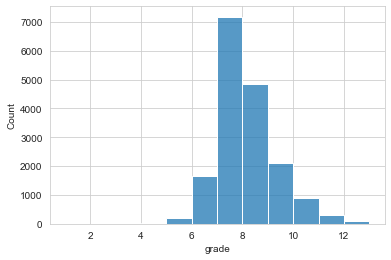

In [78]:
sns.histplot(x = data.grade, binwidth = 1)

<AxesSubplot:xlabel='grade', ylabel='price'>

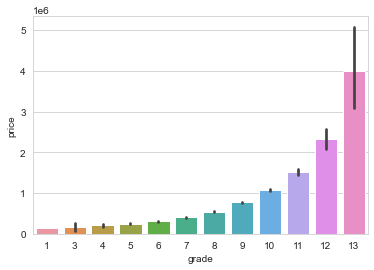

In [79]:
sns.barplot(x = data.grade, y = data.price)

In [80]:
seatle_map = gpd.read_file('/Users/ryanlewis/Downloads/KingCountyTractsShapefiles/kc_tract_10.shp')

In [291]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
geo_df = gpd.GeoDataFrame(data, 
                          crs = crs, 
                          geometry = geometry)
geo_df.columns

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_sqft', 'sqft_yd',
       'bed_bath_ratio', 'coordinates', 'dist_sb', 'dist_tmobile',
       'dist_amazon', 'age', 'geometry'],
      dtype='object')

<AxesSubplot:>

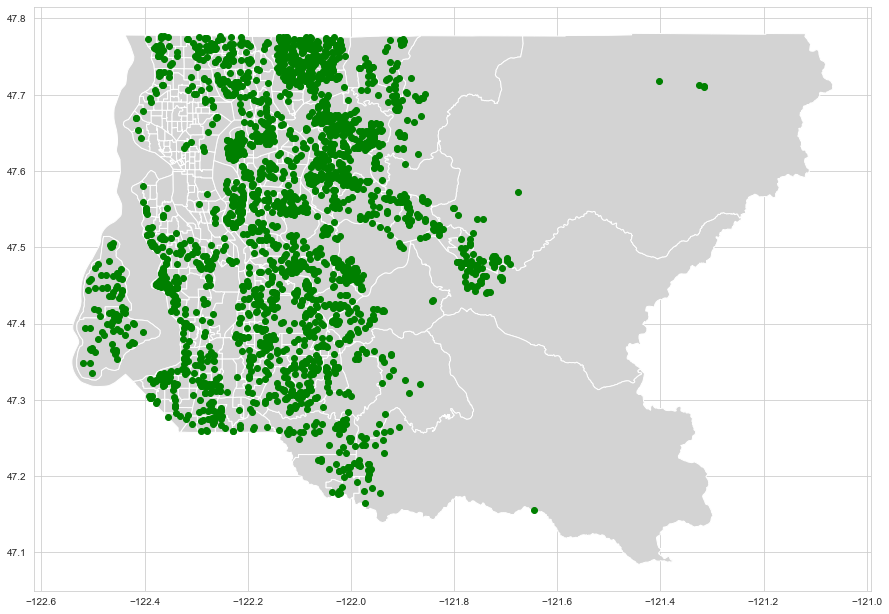

In [290]:
fig, ax = plt.subplots(figsize = (15,15))
seatle_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df[geo_df['sqft_lot'] > geo_df['sqft_lot'].mean()].plot(ax=ax, color = 'green')


In [292]:
geo_df['price_log'] = np.log(geo_df['price'])

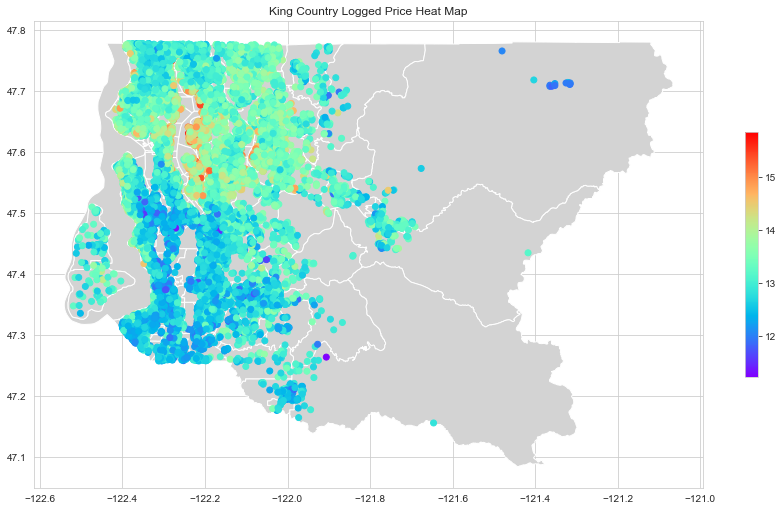

In [293]:
fig, ax = plt.subplots(figsize = (15,15))
seatle_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'price_log', ax=ax, cmap = 'rainbow', legend = True, legend_kwds={'shrink': 0.3})

ax.set_title('Kings County Logged Price Heat Map')
plt.savefig('Property Price Heat Map')

# geo_df[geo_df['grade'] <= 4].plot(ax=ax, color = 'darkblue', label = 'Low Graded')
# geo_df[geo_df['grade'] >= 10].plot(ax=ax, color = 'blue', label = 'Top Graded')



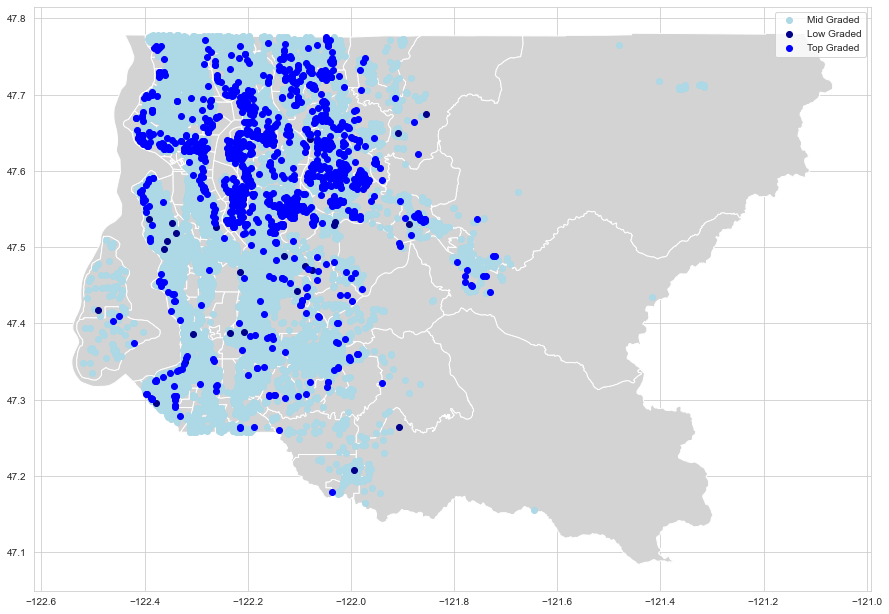

In [84]:
fig, ax = plt.subplots(figsize = (15,15))
seatle_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df[(geo_df['grade'] > 4) & (geo_df['grade'] < 10)].plot(ax=ax, color = 'lightblue', label = 'Mid Graded')
geo_df[geo_df['grade'] <= 4].plot(ax=ax, color = 'darkblue', label = 'Low Graded')
geo_df[geo_df['grade'] >= 10].plot(ax=ax, color = 'blue', label = 'Top Graded')

plt.legend()

<AxesSubplot:>

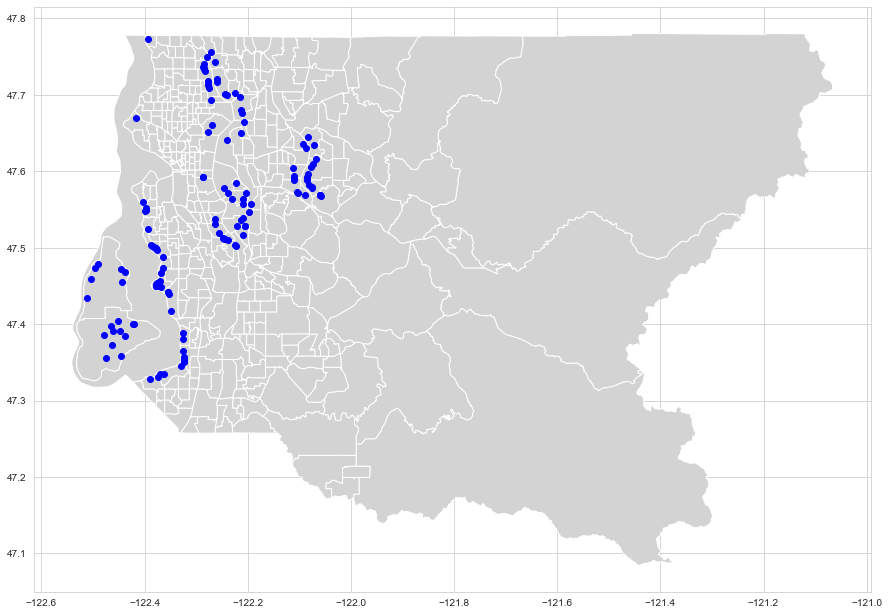

In [85]:
fig, ax = plt.subplots(figsize = (15,15))
seatle_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df[geo_df['waterfront'] == 1].plot(ax=ax, color = 'blue', label = 'Warterfront')

In [86]:
kc_map = folium.Map(location=[47.6062, -122.3321],
                   zoom_start = 10)

heat_df = data[['lat', 'long']]
heat_df = heat_df.dropna(axis=0, subset = ['lat', 'long'])

heat_data = [[row['lat'], row['long']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(kc_map)

kc_map

# Statistical Tests

In [294]:
north = data[data['lat'] > 47.5].price
south = data[data['lat'] <= 47.5].price

scipy.stats.ttest_ind(north,south, nan_policy = 'omit')

Ttest_indResult(statistic=52.39492100842781, pvalue=0.0)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

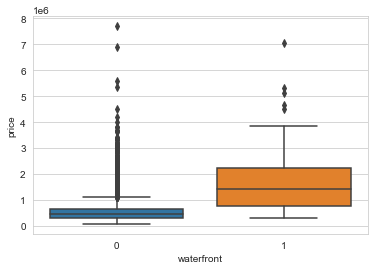

In [295]:
sns.boxplot(x = data['waterfront'], y = data['price'])

In [296]:
waterview = data[data.waterfront == 1].price
non_waterview = data[data.waterfront == 0].price

scipy.stats.ttest_ind(waterview,non_waterview, nan_policy = 'omit')

Ttest_indResult(statistic=37.72330429549608, pvalue=2.465038317654299e-299)

Alpha > p value; we reject the null hypothesis and state statistical significance in mean price between waterfront properties and non-waterfront properties

<AxesSubplot:xlabel='grade', ylabel='price'>

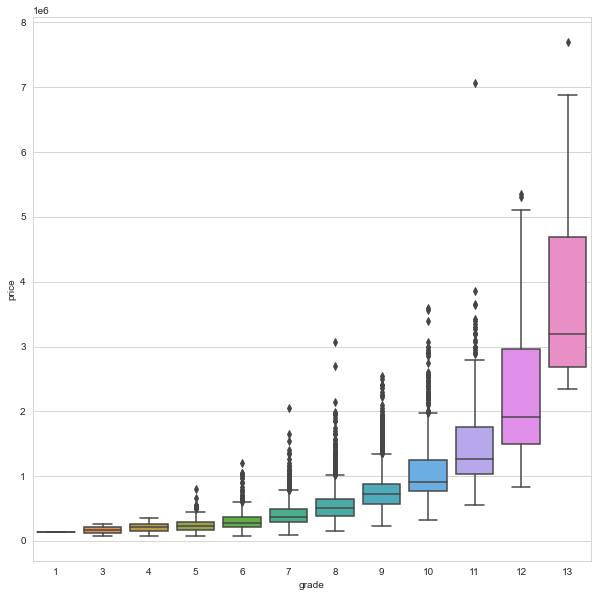

In [297]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x = data.grade, y = data.price)

In [298]:
r13 = data[data.grade == 13].price
r12 = data[data.grade == 12].price
r11 = data[data.grade == 11].price
r10 = data[data.grade == 10].price
r9 = data[data.grade == 9].price
r8 = data[data.grade == 8].price
r7 = data[data.grade == 7].price
r6 = data[data.grade == 6].price
r5 = data[data.grade == 5].price
r4 = data[data.grade == 4].price
r3 = data[data.grade == 3].price

r1 = data[data.grade == 1].price

anova_grade = scipy.stats.f_oneway(r1,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13)
anova_grade

F_onewayResult(statistic=1763.5110290471393, pvalue=0.0)

Alpha > p value; we reject the null hypothesis and state there is statistical significance between prices of houses at different grades.

<AxesSubplot:xlabel='condition', ylabel='price'>

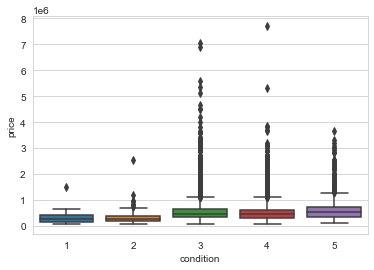

In [299]:
sns.boxplot(x = data.condition, y = data.price)

In [300]:
con1 = data[data.condition == 1].price
con2 = data[data.condition == 2].price
con3 = data[data.condition == 3].price
con4 = data[data.condition == 4].price
con5 = data[data.condition == 5].price

anova_cond = scipy.stats.f_oneway(con1, con2, con3, con4, con5)
anova_cond

F_onewayResult(statistic=28.799197350706148, pvalue=6.813536869427384e-24)

Alpha > p value; we reject the null hypothesis and state there is statistical significance between prices of houses in different conditions.



# Regression Test

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

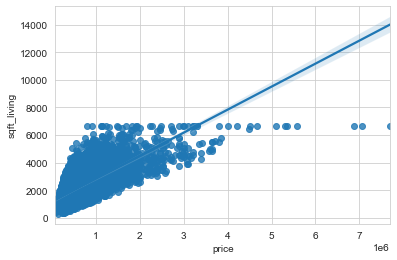

In [301]:
fig, ax = plt.subplots()
sns.regplot(x = 'price', y = 'sqft_living', data = data)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

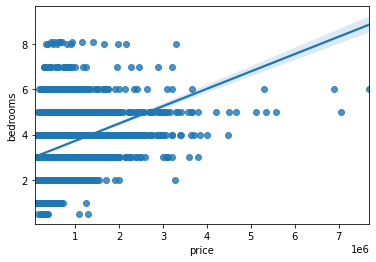

In [28]:
fig, ax = plt.subplots()
sns.regplot(x = 'price', y = 'bedrooms', data = data)

<AxesSubplot:xlabel='price', ylabel='bed_bath_ratio'>

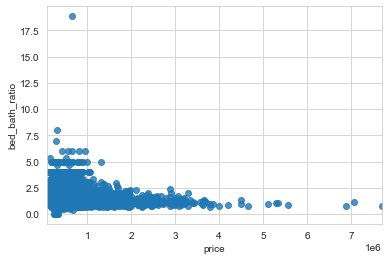

In [95]:
fig, ax = plt.subplots()
sns.regplot(x = 'price', y = 'bed_bath_ratio', data = data)

In [302]:
lr_model = ols(formula='price~sqft_living', data=data).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 1.558e+04
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:58:46   Log-Likelihood:            -2.4081e+05
No. Observations:               17290   AIC:                         4.816e+05
Df Residuals:                   17288   BIC:                         4.816e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.078e+04   5166.811     -9.829      0.000   -6.09e+04   -4.07e+04
sqft_living   284.5244      2.279    124.826      0.000     280.057     288.992
==============================================================================
Omnibus:                    15128.428   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1444152.525
Skew:                           3.762   Prob(JB):                         0.00
Kurtosis:                      47.136   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
data[['dist_amazon', 'dist_tmobile', 'dist_sb']].corr()

,dist_amazon,dist_tmobile,dist_sb
dist_amazon,1.000000,0.651543,0.952327
dist_tmobile,0.651543,1.000000,0.679695
dist_sb,0.952327,0.679695,1.000000


In [303]:
lr_model2 = ols(formula='price~dist_amazon+dist_tmobile', data=data).fit()

lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1339.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:58:56   Log-Likelihood:            -2.4512e+05
No. Observations:               17290   AIC:                         4.902e+05
Df Residuals:                   17287   BIC:                         4.903e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.386e+05   6349.454    132.076      0.000    8.26e+05    8.51e+05
dist_amazon  -6179.6694    498.108    -12.406      0.000   -7156.011   -5203.328
dist_tmobile -2.088e+04    695.603    -30.019      0.000   -2.22e+04   -1.95e+04
==============================================================================
Omnibus:                    16698.081   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1494494.183
Skew:                           4.491   Prob(JB):                         0.00
Kurtosis:                      47.652   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
lr_model2 = ols(formula='price~sqft_living+C(zipcode)+C(grade)+bed_bath_ratio+dist_amazon+waterfront', data=data).fit()

lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     892.1
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:55:25   Log-Likelihood:            -2.3186e+05
No. Observations:               17290   AIC:                         4.639e+05
Df Residuals:                   17205   BIC:                         4.645e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             1.39e+05   1.65e+05      0.844      0.399   -1.84e+05    4.62e+05
C(zipcode)[T.98002]   2.01e+04   1.61e+04      1.246      0.213   -1.15e+04    5.17e+04
C(zipcode)[T.98003] -8347.8601   1.45e+04     -0.577      0.564   -3.67e+04       2e+04
C(zipcode)[T.98004]  6.349e+05   2.02e+04     31.474      0.000    5.95e+05    6.74e+05
C(zipcode)[T.98005]  1.653e+05   2.09e+04      7.899      0.000    1.24e+05    2.06e+05
C(zipcode)[T.98006]  1.523e+05   1.67e+04      9.093      0.000    1.19e+05    1.85e+05
C(zipcode)[T.98007]  1.248e+05    2.1e+04      5.956      0.000    8.38e+04    1.66e+05
C(zipcode)[T.98008]  1.669e+05   1.78e+04      9.377      0.000    1.32e+05    2.02e+05
C(zipcode)[T.98010]  1.085e+05   2.14e+04      5.070      0.000    6.65e+04     1.5e+05
C(zipcode)[T.98011]  2.284e+04   1.86e+04      1.225      0.221   -1.37e+04    5.94e+04
C(zipcode)[T.98014]   1.25e+05   1.88e+04      6.644      0.000    8.81e+04    1.62e+05
C(zipcode)[T.98019]  6.228e+04   1.67e+04      3.732      0.000    2.96e+04     9.5e+04
C(zipcode)[T.98022]  1.549e+05   1.81e+04      8.545      0.000    1.19e+05     1.9e+05
C(zipcode)[T.98023] -3.037e+04   1.25e+04     -2.430      0.015   -5.49e+04   -5871.043
C(zipcode)[T.98024]  1.844e+05   2.24e+04      8.221      0.000     1.4e+05    2.28e+05
C(zipcode)[T.98027]  9.954e+04   1.43e+04      6.943      0.000    7.14e+04    1.28e+05
C(zipcode)[T.98028]  1.644e+04    1.8e+04      0.911      0.362   -1.89e+04    5.18e+04
C(zipcode)[T.98029]  1.483e+05   1.51e+04      9.841      0.000    1.19e+05    1.78e+05
C(zipcode)[T.98030] -3.139e+04   1.52e+04     -2.070      0.038   -6.11e+04   -1669.622
C(zipcode)[T.98031] -3.944e+04   1.54e+04     -2.563      0.010   -6.96e+04   -9278.716
C(zipcode)[T.98032] -3.309e+04    1.9e+04     -1.738      0.082   -7.04e+04    4223.505
C(zipcode)[T.98033]  2.234e+05    1.8e+04     12.411      0.000    1.88e+05    2.59e+05
C(zipcode)[T.98034]  7.435e+04   1.69e+04      4.390      0.000    4.12e+04    1.08e+05
C(zipcode)[T.98038]  3.842e+04   1.23e+04      3.130      0.002    1.44e+04    6.25e+04
C(zipcode)[T.98039]  1.065e+06   3.12e+04     34.194      0.000       1e+06    1.13e+06
C(zipcode)[T.98040]  3.734e+05   1.99e+04     18.726      0.000    3.34e+05    4.13e+05
C(zipcode)[T.98042]  1188.6141   1.25e+04      0.095      0.924   -2.32e+04    2.56e+04
C(zipcode)[T.98045]   1.81e+05   1.68e+04     10.761      0.000    1.48e+05    2.14e+05
C(zipcode)[T.98052]  1.239e+05   1.56e+04      7.916      0.000    9.32e+04    1.55e+05
C(zipcode)[T.98053]  1.426e+05   1.45e+04      9.833      0.000    1.14e+05    1.71e+05
C(zipcode)[T.98055] -4.648e+04   1.68e+04     -2.766      0.006   -7.94e+04   -1.35e+04
C(zipcode)[T.98056] -1.419e+04   1.66e+04     -0.856      0.392   -4.67e+04    1.83e+04
C(z

In [98]:
data[['sqft_living', 'dist_amazon','dist_tmobile', 'grade', 'waterfront', 'condition']].corr()

,sqft_living,dist_amazon,dist_tmobile,grade,waterfront,condition
sqft_living,1.000000,0.064973,-0.160173,0.762929,0.109738,-0.061530
dist_amazon,0.064973,1.000000,0.651752,-0.005687,-0.011844,-0.076860
dist_tmobile,-0.160173,0.651752,1.000000,-0.195444,-0.013419,-0.040869
grade,0.762929,-0.005687,-0.195444,1.000000,0.092234,-0.142066
waterfront,0.109738,-0.011844,-0.013419,0.092234,1.000000,0.009608
condition,-0.061530,-0.076860,-0.040869,-0.142066,0.009608,1.000000


In [51]:
model_df = data[['price','sqft_living', 'dist_amazon','dist_tmobile', 'grade', 'waterfront', 'condition', 'zipcode','bed_bath_ratio']]

In [52]:
model_df.corr()

,price,sqft_living,dist_amazon,dist_tmobile,grade,waterfront,condition,zipcode,bed_bath_ratio
price,1.000000,0.687770,-0.298337,-0.355573,0.666215,0.275779,0.036099,-0.048958,-0.248818
sqft_living,0.687770,1.000000,0.067401,-0.161204,0.766559,0.105367,-0.061872,-0.198455,-0.327814
dist_amazon,-0.298337,0.067401,1.000000,0.651752,-0.005687,-0.011844,-0.076860,-0.518328,-0.068087
dist_tmobile,-0.355573,-0.161204,0.651752,1.000000,-0.195444,-0.013419,-0.040869,-0.037436,0.024495
grade,0.666215,0.766559,-0.005687,-0.195444,1.000000,0.092234,-0.142066,-0.184946,-0.403014
waterfront,0.275779,0.105367,-0.011844,-0.013419,0.092234,1.000000,0.009608,0.034282,-0.053265
condition,0.036099,-0.061872,-0.076860,-0.040869,-0.142066,0.009608,1.000000,0.007068,0.123918
zipcode,-0.048958,-0.198455,-0.518328,-0.037436,-0.184946,0.034282,0.007068,1.000000,0.129800
bed_bath_ratio,-0.248818,-0.327814,-0.068087,0.024495,-0.403014,-0.053265,0.123918,0.129800,1.000000


In [57]:
dummy_df = pd.get_dummies(model_df, columns = ['grade', 'condition', 'zipcode'], drop_first = True)
dummy_df

,price,sqft_living,dist_amazon,dist_tmobile,waterfront,bed_bath_ratio,grade_3,grade_4,grade_5,grade_6,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,365000.0,2070.0,15.095046,9.672506,0,1.777778,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,865000.0,2900.0,4.558244,8.861090,0,1.666667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1038000.0,3770.0,10.500562,1.966793,0,1.600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1490000.0,4560.0,7.355444,8.835713,0,0.857143,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,711000.0,2550.0,12.202455,7.075604,0,1.200000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,3240.0,10.803378,2.545841,0,2.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17286,440000.0,1300.0,3.923074,8.445981,0,1.142857,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17287,310000.0,1050.0,10.349418,13.532643,0,3.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17288,427500.0,1900.0,21.428461,13.710433,0,2.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# model_cols = ['sqft_living', 'dist_amazon','dist_tmobile', 'grade', 'waterfront', 'condition']
X = dummy_df.drop(columns = 'price')
y = dummy_df.price

reg = LinearRegression()
lm = reg.fit(X,y)

print(lm.intercept_)
print(lm.coef_)
lm.score(X, y)


131814.86088356434
[ 1.60095131e+02 -1.58294093e+04  6.68709533e+03  8.23114296e+05
 -4.26108342e+03  2.00970809e+02  7.81978139e+03 -4.42624067e+04
 -5.65720892e+04 -5.86247142e+04 -2.64314285e+04  6.32669155e+04
  2.10004010e+05  4.36728520e+05  9.62271478e+05  2.43633316e+06
  9.17454673e+04  9.56600970e+04  1.26051245e+05  1.74770181e+05
  1.52090657e+04 -1.41093463e+04  6.46138765e+05  1.86046700e+05
  1.85505931e+05  1.55383809e+05  1.98101520e+05  1.25760138e+05
  1.34055764e+04  1.56137009e+05  8.80967485e+04  1.52647631e+05
 -4.44130973e+04  2.25344515e+05  1.40998429e+05 -5.12533493e+03
  1.95327370e+05 -1.59448008e+04 -2.65713831e+04 -3.75017006e+04
  2.20756763e+05  6.34700136e+04  6.87359787e+04  1.05855003e+06
  3.77416877e+05  1.60300165e+04  2.15931257e+05  1.40494284e+05
  1.75433138e+05 -2.38050623e+04  5.40545961e+03 -6.72022622e+03
  2.28437854e+04  1.58719932e+05 -5.67551994e+04  7.01079757e+04
  1.31751644e+05  1.43702480e+05  5.11289242e+04  5.78151798e+03
  2.36

0.8167841068156816

In [59]:
dummy_df.corr()

,price,sqft_living,dist_amazon,dist_tmobile,waterfront,bed_bath_ratio,grade_3,grade_4,grade_5,grade_6,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
price,1.000000,0.687770,-0.298337,-0.355573,0.275779,-0.248818,-0.010725,-0.031562,-0.084280,-0.206989,...,-0.056960,-0.035934,-0.045335,-0.018183,-0.090086,0.034662,-0.068552,-0.053705,-0.071636,0.082508
sqft_living,0.687770,1.000000,0.067401,-0.161204,0.105367,-0.327814,-0.017684,-0.055909,-0.131122,-0.317055,...,-0.058140,-0.027045,-0.049320,0.001625,-0.075368,0.015366,-0.041838,-0.025590,-0.042058,0.014059
dist_amazon,-0.298337,0.067401,1.000000,0.651752,-0.011844,-0.068087,0.031783,0.012515,0.040474,-0.031620,...,-0.056613,0.007541,-0.049429,-0.001837,-0.038412,-0.053614,-0.035193,0.008086,0.070686,-0.148558
dist_tmobile,-0.355573,-0.161204,0.651752,1.000000,-0.013419,0.024495,0.032384,0.002663,0.036067,0.036461,...,-0.007128,0.016094,0.086208,0.030940,-0.037968,0.090123,-0.091274,-0.003066,0.091188,0.027271
waterfront,0.275779,0.105367,-0.011844,-0.013419,1.000000,-0.053265,-0.000965,-0.003202,0.015305,-0.013621,...,0.027643,-0.004479,0.010184,0.079297,-0.010065,-0.004311,0.030993,-0.007144,0.036211,-0.005931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98177,0.034662,0.015366,-0.053614,0.090123,-0.004311,0.004850,-0.001215,-0.004033,-0.007028,-0.015496,...,-0.013576,-0.005642,-0.016243,-0.012500,-0.012680,1.000000,-0.012680,-0.009001,-0.012829,-0.014125
zipcode_98178,-0.068552,-0.041838,-0.035193,-0.091274,0.030993,0.060374,-0.001207,-0.004005,0.013011,0.075550,...,-0.013481,-0.005603,-0.016129,-0.012412,-0.012592,-0.012680,1.000000,-0.008938,-0.012739,-0.014026
zipcode_98188,-0.053705,-0.025590,0.008086,-0.003066,-0.007144,0.035353,-0.000857,-0.002843,0.019452,0.008985,...,-0.009569,-0.003977,-0.011449,-0.008811,-0.008938,-0.009001,-0.008938,1.000000,-0.009042,-0.009956
zipcode_98198,-0.071636,-0.042058,0.070686,0.091188,0.036211,0.040753,-0.001221,0.024899,0.002743,0.022899,...,-0.013639,-0.005669,-0.016318,-0.012558,-0.012739,-0.012829,-0.012739,-0.009042,1.000000,-0.014191


In [60]:
list(zip(dummy_df, lm.coef_))

[('price', 160.09513105359892),
 ('sqft_living', -15829.409260147266),
 ('dist_amazon', 6687.0953310773475),
 ('dist_tmobile', 823114.2960168644),
 ('waterfront', -4261.08342195733),
 ('bed_bath_ratio', 200.9708087373292),
 ('grade_3', 7819.7813852941035),
 ('grade_4', -44262.40666954324),
 ('grade_5', -56572.08921721857),
 ('grade_6', -58624.71423433034),
 ('grade_7', -26431.428498744615),
 ('grade_8', 63266.91553881939),
 ('grade_9', 210004.01002490486),
 ('grade_10', 436728.5204010074),
 ('grade_11', 962271.4781967005),
 ('grade_12', 2436333.1610863833),
 ('grade_13', 91745.46729998104),
 ('condition_2', 95660.09699962672),
 ('condition_3', 126051.2446948801),
 ('condition_4', 174770.18129891573),
 ('condition_5', 15209.065709214738),
 ('zipcode_98002', -14109.346341991055),
 ('zipcode_98003', 646138.7652223343),
 ('zipcode_98004', 186046.6996194358),
 ('zipcode_98005', 185505.93118940457),
 ('zipcode_98006', 155383.80891432182),
 ('zipcode_98007', 198101.51952409197),
 ('zipcode_98

In [61]:
y_pred = lm.predict(X)

In [62]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

93091.20867509794
159789.81049041988


Text(0, 0.5, 'Predictions')

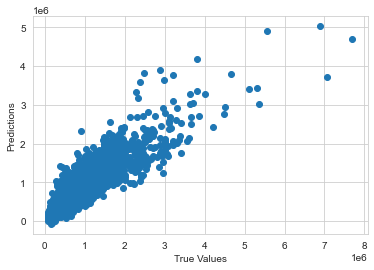

In [208]:
plt.scatter( dummy_df['price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [63]:
lm.score(X, y)

0.8167841068156816

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

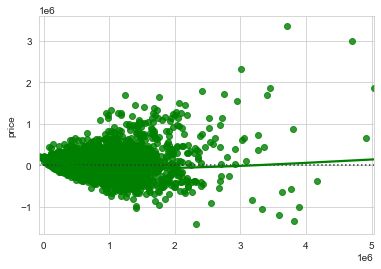

In [210]:
sns.residplot(y_pred, dummy_df['price'], lowess=True, color="g")

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


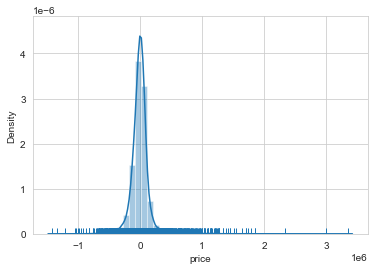

In [212]:
residuals =  dummy_df['price'] - y_pred
sns.distplot(residuals, kde=True, rug=True);

In [213]:
print (scipy.stats.shapiro(residuals))

ShapiroResult(statistic=0.7724053859710693, pvalue=0.0)


/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


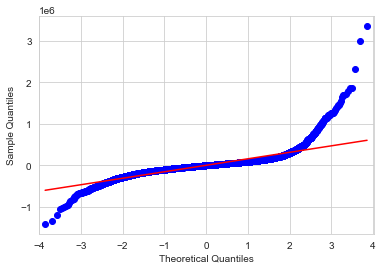

In [215]:
fig = sm.qqplot(residuals,line='s')
plt.show()

In [ ]:
# Ask Sean about by distance calcs being a negative correlation

In [ ]:
# outcome = 'price'
# predictors = ols_df.drop('price', axis=1)
# pred_sum = '+'.join(predictors.columns)
# formula = outcome + '~' + pred_sum
# model = ols(formula=formula, data=ols_df).fit()
# model.summary()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9,test_size=0.2)

In [65]:
X_train

,sqft_living,dist_amazon,dist_tmobile,waterfront,bed_bath_ratio,grade_3,grade_4,grade_5,grade_6,grade_7,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
7189,1930.0,6.040931,10.213257,0,1.777778,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12378,1060.0,12.811031,8.419236,0,2.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5664,1390.0,13.368861,9.070348,0,1.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
927,1560.0,2.601715,6.416720,0,3.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14353,3674.0,12.905558,12.914245,0,1.230769,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,2510.0,12.410899,8.896541,0,1.200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4673,1390.0,32.705170,26.662096,0,1.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5014,1520.0,7.793687,12.626184,0,1.200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9979,1590.0,8.680569,10.428468,0,1.500000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#instantiate a linear regression object
test_lm = LinearRegression()

#fit the linear regression to the data
test_lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 161103.52943494625


In [67]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 155501.59565421595
Training:  161103 vs. Testing:  155501


In [68]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(X)
poly2_columns = poly_2.get_feature_names(X.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,sqft_living,dist_amazon,dist_tmobile,waterfront,bed_bath_ratio,grade_3,grade_4,grade_5,grade_6,grade_7,...,zipcode_98178^2,zipcode_98178 zipcode_98188,zipcode_98178 zipcode_98198,zipcode_98178 zipcode_98199,zipcode_98188^2,zipcode_98188 zipcode_98198,zipcode_98188 zipcode_98199,zipcode_98198^2,zipcode_98198 zipcode_98199,zipcode_98199^2
0,2070.0,15.095046,9.672506,0.0,1.777778,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2900.0,4.558244,8.861090,0.0,1.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3770.0,10.500562,1.966793,0.0,1.600000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4560.0,7.355444,8.835713,0.0,0.857143,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2550.0,12.202455,7.075604,0.0,1.200000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly2, y, random_state=9,test_size=0.2)

In [136]:
test_lm_2 = LinearRegression()

#fit the linear regression to the data
test_lm_2 = test_lm_2.fit(X_train2, y_train2)

y_train_pred2 = test_lm_2.predict(X_train2)

train_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))


print('Training Root Mean Squared Error:' , train_rmse2)

Training Root Mean Squared Error: 105602.4434016412


In [72]:
# use fitted model to predict on test data
y_pred2 = test_lm_2.predict(X_test2)

test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Testing Root Mean Squared Error:' , test_rmse2)


print('Training: ', int(train_rmse2), "vs. Testing: ", int(test_rmse2))

Testing Root Mean Squared Error: 146391.72433188016
Training:  105602 vs. Testing:  146391


In [131]:
selector = SelectKBest(f_regression, k=150)

selector.fit(X_train2, y_train2)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=150, score_func=<function f_regression at 0x7ff5ff2534c0>)

In [132]:
selector.get_support()

array([ True,  True,  True, ..., False, False, False])

In [133]:
selected_columns = X_train2.columns[selector.get_support()]
removed_columns = X_train2.columns[~selector.get_support()]

In [134]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train2[selected_columns], y_train2)

y_train_kbest = lm_kbest.predict(X_train2[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train2, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test2[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 134993.18039191392
Testing Root Mean Squared Error: 147589.43478690722


In [135]:
print('Poly_2: ', test_rmse2, '\n',
      "KBest:   ", testK_rmse,'\n')

Poly_2:  146391.72433188016 
 KBest:    147589.43478690722 



In [53]:
data['price'].std()

373318.9787492793

In [139]:
lm_final = LinearRegression()
lm_final = lm_final.fit(X_train2[selected_columns], y_train2)

In [142]:
lm_final.intercept_

156961.07402644597

In [143]:
print(len(lm_final.coef_))

150


In [140]:
lm_final.coef_

array([ 3.20343340e+02, -2.53688830e+04, -1.65656525e+03,  2.29111733e+05,
        5.20917758e+04,  1.20049209e+04,  1.78002526e+04,  1.48792526e+04,
       -7.24769737e+04,  2.19971167e+05, -7.21487918e+05,  3.34275045e+06,
        1.27888432e+06,  2.17087477e+05,  1.81760813e+06,  6.10678386e+04,
       -2.11639039e+05, -2.63686409e-02,  2.03249347e+02, -2.87608260e+01,
       -9.53394324e+01, -6.01916411e+01,  6.05003666e+01,  1.02320045e+02,
        1.50954228e+02,  3.94768458e+02, -1.11675792e+03, -1.36336595e+01,
        2.66344091e+01,  8.09740754e+00,  6.56796931e+01,  7.24393510e+01,
        2.33059481e+02,  7.91488862e+01,  1.31182239e+01,  8.42559835e+01,
        1.35041517e+02, -7.11486142e+00,  2.36472741e+03, -3.90233080e+03,
       -1.23465943e+04, -1.93557166e+03,  6.16181226e+03,  2.63689002e+03,
       -8.82517706e+03, -1.93921885e+04, -4.09358605e+04, -6.09304900e+04,
       -9.64203084e+04,  4.72180129e+03,  1.21801796e+03, -3.32948550e+05,
       -5.16806247e+04, -

In [141]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()